In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
np.random.seed(0)

In [3]:
# number of points
n_pts = 500
# declare centers of blob regions
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
# declare points and labels uning blob dataset
# number of points, same random samples each run, centers, spreadness level(the higher, the more spreaded)
X, Y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

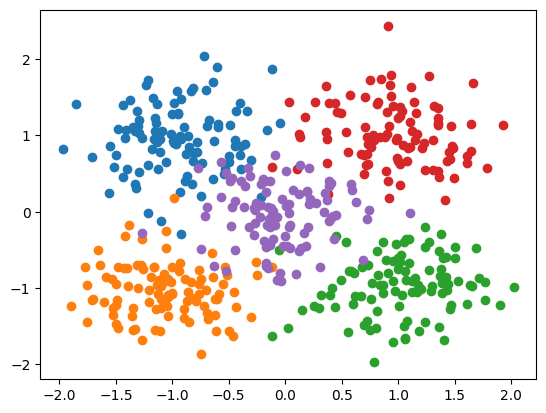

In [4]:
# plot the points
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])

In [5]:
# categorize labels into distinct array of 0 and 1, in other words, one hot encoding
# here we needed to categorize into 3 categories
y_cat = to_categorical(Y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [6]:
# choose the model
model = Sequential()
# add neurons. units stands for the number of classes we're going to classify out data in. use activation function softmax, sigmoid is inapropriate for multiclass
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
# compile the model using Adam algorithm with learning rate 0.1, error function categorical crossentropy, and store accuracy
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\OstadeKachal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# fit the model on the samples and categorized labels
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4331 - loss: 1.3737  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8544 - loss: 0.6200 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8909 - loss: 0.4326 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9387 - loss: 0.3298 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.2838 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9443 - loss: 0.2678 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.2471 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.2489 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.2225 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.2192 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9551 - loss: 0.1892 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [8]:
# plot the contourf using points, categorized labels and model
def plot_decision_boundary(X, y_cat, model):
  # create the span of x and y values: [min - 1, max + 1]
  # the default length of the span is 50
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  # create the 50x50 matrix for xs and ys
  # xx: [
  #   [x1, x2, ...]
  #   ...
  #   [x1, x2, ...]
  # ]
  # yy: [
  #   [y1, y1, ...]
  #   ...
  #   [y50, y50, ...]
  # ]
  xx, yy = np.meshgrid(x_span, y_span)
  # reshape the xx and yy into 1D
  xx_, yy_ = xx.ravel(), yy.ravel()
  # merge xx_ and yy_ column-wise
  grid = np.c_[xx_, yy_]
  # predict multiclass model using the grid
  predict_function = model.predict(grid)
  # declare multiclass predict function to store classes distinctively
  multiclass_pred_func = np.argmax(predict_function, axis=1)
  # reshape the z into xx shape, that is 50x50 to create the grids on the contourf
  z = multiclass_pred_func.reshape(xx.shape)
  # plot the contourf
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction is: [[7.4694370e-05 3.3574113e-05 1.6446235e-02 5.6696840e-02 9.2674863e-01]]


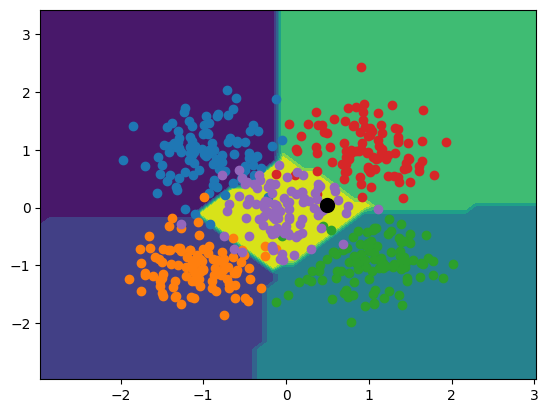

In [10]:
# plot the contourf with samplees, categorized labels and model
plot_decision_boundary(X, y_cat, model)
# plot the points
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])
# declare a point to test the prediction
x, y = 0.5, 0.05
point = np.array([[x, y]])
# store the prediction
prediction = model.predict(point)
# plot the point in a red circle, size 10 and output the prediction
plt.plot([x], [y], marker='o', markersize=10, color='black')
print(f'Prediction is: {prediction}')